In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 100  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169001437/169001437 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# resnet50 Model

In [4]:
resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x = tf.keras.layers.Dense(100, activation='softmax')(resnet50.output)
resnet50_model = tf.keras.Model(resnet50.input, x)

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

resnet50_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
history1 = resnet50_model.fit(x_train, y_train, epochs=50, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 75s 47ms/step - loss: 4.6433 - accuracy: 0.0433 - val_loss: 4.2482 - val_accuracy: 0.0755
Epoch 2/50
782/782 [==============================] - 35s 45ms/step - loss: 3.9171 - accuracy: 0.1039 - val_loss: 3.8844 - val_accuracy: 0.1254
Epoch 3/50
782/782 [==============================] - 35s 45ms/step - loss: 3.6290 - accuracy: 0.1512 - val_loss: 3.7927 - val_accuracy: 0.1440
Epoch 4/50
782/782 [==============================] - 35s 45ms/step - loss: 3.3844 - accuracy: 0.1931 - val_loss: 3.6004 - val_accuracy: 0.1726
Epoch 5/50
782/782 [==============================] - 35s 45ms/step - loss: 3.1726 - accuracy: 0.2316 - val_loss: 3.5338 - val_accuracy: 0.1951
Epoch 6/50
782/782 [==============================] - 35s 45ms/step - loss: 2.9666 - accuracy: 0.2657 - val_loss: 3.3318 - val_accuracy: 0.2118
Epoch 7/50
782/782 [==============================] - 35s 45ms/step - loss: 2.7716 - accuracy: 0.3040 - val_loss: 3.6834 - val_accuracy:

In [7]:
resnet50_model.save("resnet50_model.h5")

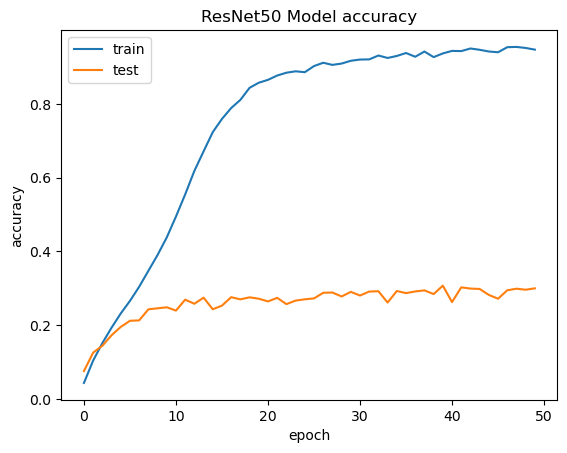

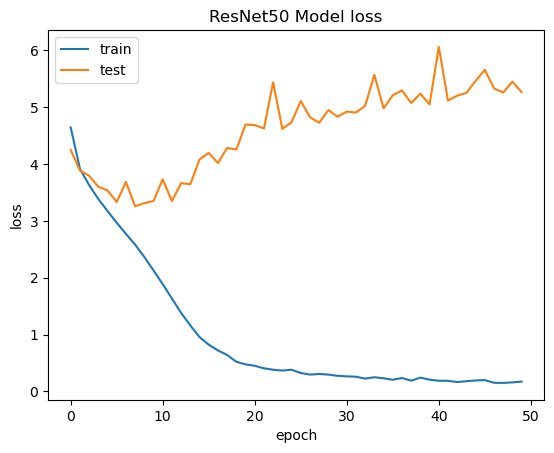

In [8]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# resnet101 Model

In [9]:
resnet101 = tf.keras.applications.resnet.ResNet101(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x1 = tf.keras.layers.Dense(100, activation='softmax')(resnet101.output)
resnet101_model = tf.keras.Model(resnet101.input, x1)

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

resnet101_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
history2 = resnet101_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 128s 85ms/step - loss: 4.6939 - accuracy: 0.0295 - val_loss: 4.3375 - val_accuracy: 0.0566
Epoch 2/50
782/782 [==============================] - 65s 83ms/step - loss: 4.1265 - accuracy: 0.0717 - val_loss: 4.0169 - val_accuracy: 0.0860
Epoch 3/50
782/782 [==============================] - 64s 82ms/step - loss: 3.8931 - accuracy: 0.1059 - val_loss: 4.0212 - val_accuracy: 0.1132
Epoch 4/50
782/782 [==============================] - 66s 84ms/step - loss: 3.6978 - accuracy: 0.1377 - val_loss: 3.7562 - val_accuracy: 0.1393
Epoch 5/50
782/782 [==============================] - 65s 82ms/step - loss: 3.5014 - accuracy: 0.1711 - val_loss: 3.6654 - val_accuracy: 0.1604
Epoch 6/50
782/782 [==============================] - 66s 84ms/step - loss: 3.3208 - accuracy: 0.2013 - val_loss: 3.4903 - val_accuracy: 0.1905
Epoch 7/50
782/782 [==============================] - 66s 84ms/step - loss: 3.1443 - accuracy: 0.2346 - val_loss: 3.6382 - val_accuracy

In [12]:
resnet101_model.save("resnet101_model.h5")

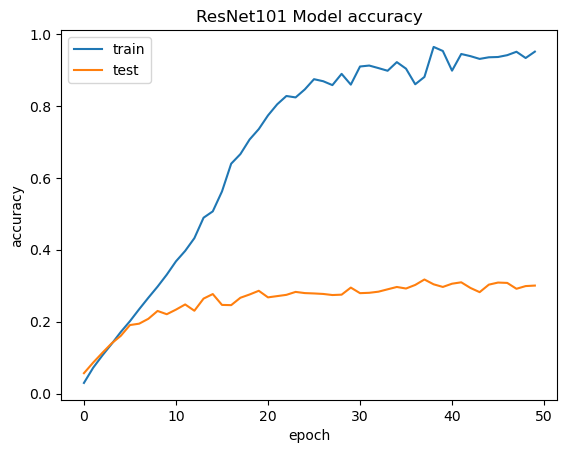

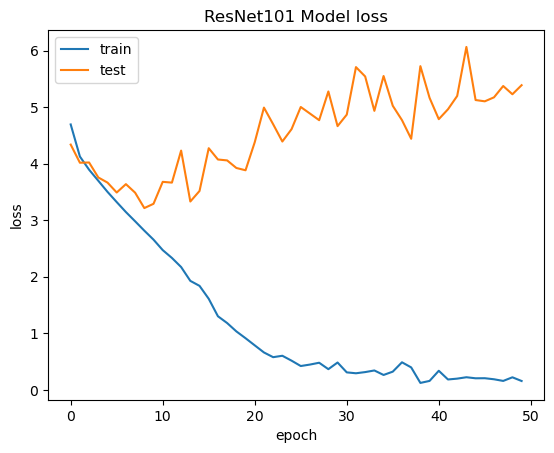

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ResNet101 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('ResNet101 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()